## Goldsmiths University of London

### Team Leader......: Carlos Alves (cdeol003)
### Team Member..: Sandor Kanda (skand001)
### Created...: 14/02/2023

## Data Mining Coursework - Part 2

## Import the necessary libraries and load the datasets :

In [1]:
# Import numpy for numerical computing
import numpy as np

# Import pandas for data manipulation
import pandas as pd

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Import seaborn for visualization
import seaborn as sns

# Import sklearn model selection for splitting data into training and testing sets, grid search for hyperparameter tuning and cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Import sklearn metrics for k-nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# Import sklearn metrics for decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Import sklearn metrics for random forest classifier, bagging classifier and adaboost classifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

# Import sklearn metrics for support vector machine classifier
from sklearn.svm import SVC

# Import sklearn metrics for accuracy score, confusion matrix and classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import RandomizedSearchCV for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Load the datasets
train_df = pd.read_csv("creditdefault_train.csv")
test_df = pd.read_csv("creditdefault_test.csv")


## Split the training and testing datasets :

In [2]:
# Split the training dataset into features and target variables
X_train = train_df.drop("Y", axis=1)
y_train = train_df["Y"]

# Split the testing dataset into features and target variables
X_test = test_df.drop("Y", axis=1)
y_test = test_df["Y"]


In [3]:
# Dictionary to store the best models and their scores
best_models = {}


## 1. k-Nearest Neighbours :

In [4]:
# Store the instance of the k-nearest neighbors classifier
knn = KNeighborsClassifier()

# Create a dictionary of hyperparameters to tune
knn_params = {'n_neighbors': list(range(1, 50))}

# Perform grid search to find the best hyperparameters
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')

# Fit the grid search object to the training data
knn_grid.fit(X_train, y_train)

# Store the best model and its score
best_knn = knn_grid.best_estimator_
knn_score = knn_grid.best_score_

# Add the best model and its score to the dictionary
best_models['kNN'] = (best_knn, knn_score)


c:\Users\Carlos Alves\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Carlos Alves\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

## 2. Decision Trees :

In [5]:
# Store the instance of the decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Create a dictionary of hyperparameters to tune
dt_params = {'max_depth': list(range(1, 20))}

# Perform grid search to find the best hyperparameters
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy')

# Fit the grid search object to the training data
dt_grid.fit(X_train, y_train)

# Store the best model and its score
best_dt = dt_grid.best_estimator_
dt_score = dt_grid.best_score_

# Add the best model and its score to the dictionary
best_models['Decision Tree'] = (best_dt, dt_score)


## 3. Random Forest :

In [6]:
# Store the instance of the random forest classifier
rf = RandomForestClassifier(random_state=42)

# Create a dictionary of hyperparameters to tune
rf_params = {'n_estimators': [10, 50, 100, 150, 200]}

# Perform grid search to find the best hyperparameters
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')

# Fit the grid search object to the training data
rf_grid.fit(X_train, y_train)

# Store the best model and its score
best_rf = rf_grid.best_estimator_
rf_score = rf_grid.best_score_

# Add the best model and its score to the dictionary
best_models['Random Forest'] = (best_rf, rf_score)


## 4. Bagging :

In [7]:
# Store the instance of bagging classifier
bag = BaggingClassifier(random_state=42)

# Create a dictionary of hyperparameters to tune
bag_params = {'n_estimators': [10, 50, 100, 150, 200]}

# Perform grid search to find the best hyperparameters
bag_grid = GridSearchCV(bag, bag_params, cv=5, scoring='accuracy')

# Fit the grid search object to the training data
bag_grid.fit(X_train, y_train)

# Store the best model and its score
best_bag = bag_grid.best_estimator_
bag_score = bag_grid.best_score_

# Add the best model and its score to the dictionary
best_models['Bagging'] = (best_bag, bag_score)


## 5. AdaBoost :

In [8]:
# Store the instance of adaboost classifier
ada = AdaBoostClassifier(random_state=42)

# Create a dictionary of hyperparameters to tune
ada_params = {'n_estimators': [10, 50, 100, 150, 200]}

# Perform grid search to find the best hyperparameters
ada_grid = GridSearchCV(ada, ada_params, cv=5, scoring='accuracy')

# Fit the grid search object to the training data
ada_grid.fit(X_train, y_train)

# Store the best model and its score
best_ada = ada_grid.best_estimator_
ada_score = ada_grid.best_score_

# Add the best model and its score to the dictionary
best_models['AdaBoost'] = (best_ada, ada_score)


## 6. SVM :

In [26]:
# Store the instance of support vector machine classifier
svm = SVC(random_state=42)

# Create a dictionary of hyperparameters to tune
svm_params = {'C': np.logspace(-1, 2, 4), 'kernel': ['linear', 'rbf']}

# Perform randomized search to find the best hyperparameters
n_iter_search = 5  # Change this number to control the number of iterations

# Create an instance of RandomizedSearchCV
svm_rand = RandomizedSearchCV(svm, svm_params, n_iter=n_iter_search, cv=5, scoring='accuracy', random_state=42)

# Fit the randomized search object to the training data
svm_rand.fit(X_train, y_train)

# Store the best model and its score
best_svm = svm_rand.best_estimator_
svm_score = svm_rand.best_score_

# Add the best model and its score to the dictionary
best_models['SVM'] = (best_svm, svm_score)

## Select the best model :

In [21]:
# Find the best model and its score
best_model_name, (best_model, best_score) = max(best_models.items(), key=lambda x: x[1][1])

# Print the best model and its score
print(f"\nBest Model.............: {best_model_name} with accuracy {best_score:.2%}")

# Print the best model's parameters
print("\n>> Best Model Parameters\n")

# Loop through the best model's parameters and print them in a new line
for key, value in best_model.get_params().items():
    print(key, ":", value)
    print("\n")



Best Model.............: Decision Tree with accuracy 82.19%

>> Best Model Parameters

ccp_alpha : 0.0


class_weight : None


criterion : gini


max_depth : 1


max_features : None


max_leaf_nodes : None


min_impurity_decrease : 0.0


min_samples_leaf : 1


min_samples_split : 2


min_weight_fraction_leaf : 0.0


random_state : 42


splitter : best




## Evaluate the best model on the test set :

In [25]:
# Predict the target variable for the test dataset
y_pred = best_model.predict(X_test)

# Store the accuracy score
accuracy = accuracy_score(y_test, y_pred) * 100

# Print the accuracy score, confusion matrix and classification report
print("\nAccuracy..........: {:.2f}%".format(accuracy))
print("\nConfusion Matrix..:\n\n", confusion_matrix(y_test, y_pred))
print("\n>> Classification Report\n\n", classification_report(y_test, y_pred))



Accuracy..........: 81.73%

Confusion Matrix..:

 [[11181   501]
 [ 2240  1078]]

>> Classification Report

               precision    recall  f1-score   support

           0       0.83      0.96      0.89     11682
           1       0.68      0.32      0.44      3318

    accuracy                           0.82     15000
   macro avg       0.76      0.64      0.67     15000
weighted avg       0.80      0.82      0.79     15000



## Plot hyperparameter vs accuracy for each algorithm :

In [12]:
# Create a new empty figure with a size of 15 x 10
plt.figure(figsize=(15, 10))


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

## 1. kNN :

Text(0, 0.5, 'Accuracy')

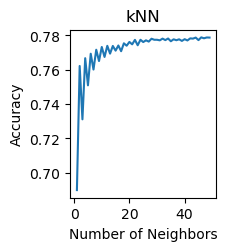

In [13]:
# Create a subplot with 2 rows and 3 columns
plt.subplot(231)

# Plot the training and testing accuracies
plt.plot(list(range(1, 50)), knn_grid.cv_results_['mean_test_score'])

# Set the title, x-axis label and y-axis label
plt.title('kNN')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')


## 2. Decison Tree :

Text(0, 0.5, 'Accuracy')

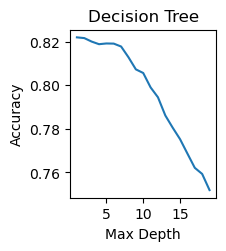

In [14]:
# Create a subplot with 2 rows and 3 columns
plt.subplot(232)

# Plot the training and testing accuracies
plt.plot(list(range(1, 20)), dt_grid.cv_results_['mean_test_score'])

# Set the title, x-axis label and y-axis label
plt.title('Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')


## 3. Random Forest :

Text(0, 0.5, 'Accuracy')

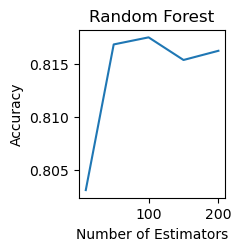

In [15]:
# Create a subplot with 2 rows and 3 columns
plt.subplot(233)

# Plot the training and testing accuracies
plt.plot([10, 50, 100, 150, 200], rf_grid.cv_results_['mean_test_score'])

# Set the title, x-axis label and y-axis label
plt.title('Random Forest')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')


## 4. Bagging :

Text(0, 0.5, 'Accuracy')

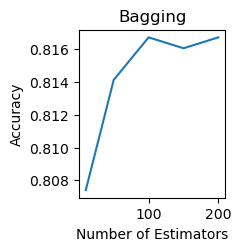

In [16]:
# Create a subplot with 2 rows and 3 columns
plt.subplot(234)

# Plot the training and testing accuracies
plt.plot([10, 50, 100, 150, 200], bag_grid.cv_results_['mean_test_score'])

# Set the title, x-axis label and y-axis label
plt.title('Bagging')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')


## 5. AdaBoost :

Text(0, 0.5, 'Accuracy')

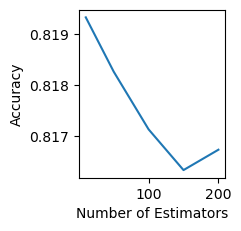

In [17]:
# Create a subplot with 2 rows and 3 columns
plt.subplot(235)

# Plot the training and testing accuracies
plt.plot([10, 50, 100, 150, 200], ada_grid.cv_results_['mean_test_score'])

# Set the title, x-axis label and y-axis label
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')


## 6. SVM :

ValueError: x and y must have same first dimension, but have shapes (4,) and (1,)

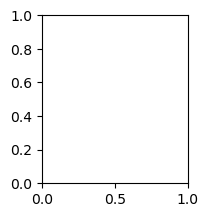

In [18]:
# Create a subplot with 2 rows and 3 columns
plt.subplot(236)

# Store the grid search object for the support vector machine classifier
svm_grid = svm_rand

# Extract the training and testing accuracies for linear and rbf kernels
linear_scores = svm_grid.cv_results_['mean_test_score'][::2]
rbf_scores = svm_grid.cv_results_['mean_test_score'][1::2]

# Plot the training and testing accuracies
plt.plot([0.1, 1, 10, 100], linear_scores, label='Linear')
plt.plot([0.1, 1, 10, 100], rbf_scores, label='RBF')

# Set the title, x-axis label and y-axis label
plt.title('SVM')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()

# Adjust the layout of the subplots and display the plot
plt.tight_layout()
plt.show()
